# 키워드 분석(Keyword Analysis)

- 핵심어: 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 혹은 문구
- 분석 과정
  1. 자연어 처리
    - 불용어 제거
    - 어간 추출
    - 형태소 분석
  1. 형태소 등장 빈도 분석
    - 핵심어 추출
- 자주 나오는 형태소가 텍스트의 주제를 표출한다는 전제에서 시작
- 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 가지고 있지 않는 불용어는 제외
- 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선순위 측정 등 다양하게 활용

### 한글 폰트 설정
- 실행 후 런타임 재시작 필요

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

In [19]:
!apt install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [11]:
# Restart runtime

### Install Konlpy & Mecab
- Konlpy: 한국어 전용 자연어 처리
- MeCab: 형태소 분석기

In [2]:
!set -x \
&& pip install konlpy \
&& curl -L https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ curl -L https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
100  5064  100  5064    0     0  90428      0 ++ uname
--:--:-- --:--:-- --:--:-- 90428
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]

## 네이버 영화 리뷰 데이터

In [5]:
import urllib.request

In [35]:
# github docs: 'https://raw.githubusercontent.com/user/repositories/master/filename.filetype'

In [6]:
raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
raw[:5]

[b'id\tdocument\tlabel\n',
 b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n',
 b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x

- 데이터는 모두 바이터로 이루어져있고, 리뷰 이외의 데이터도 존재
  - 예시: b'id\tdocument\tlabel\n'
- 문자열로 변환하여 리뷰만 추출

In [7]:
raw = [x.decode() for x in raw[1:]]

reviews = []
for i in raw:
    reviews.append(i.split('\t')[1])

reviews[:5]

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']

### Mecab
- 형태소 분석기로 명사만 추출

In [4]:
from konlpy.tag import Mecab

In [8]:
tagger = Mecab()

nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        nouns.append(noun)

nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

### 불용어(Stopwords) 사전 만들기
- 불용어 사전을 유지하면서 불필요한 단어를 제거할 필요가 있음
  - 예시: 전, 난, 일, 걸 등등
- 빈도가 너무 많아 분석에 방해되는 단어 제거도 필요
  - 예시: 영화

In [9]:
stop_words = "영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 말 나 수 거 점 것"
stop_words = stop_words.split(' ')
stop_words

['영화',
 '전',
 '난',
 '일',
 '걸',
 '뭐',
 '줄',
 '만',
 '건',
 '분',
 '개',
 '끝',
 '잼',
 '이거',
 '번',
 '중',
 '듯',
 '때',
 '게',
 '말',
 '나',
 '수',
 '거',
 '점',
 '것']

### 불용어를 제거하여 형태소 분석 수행

In [10]:
nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            nouns.append(noun)

nouns[:10]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리']

### 단어의 빈도수 측정
- ```collections```의 ```Counter``` 함수를 이용

In [11]:
from collections import Counter

In [12]:
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(50))
top_nouns

{'감독': 5629,
 '감동': 6489,
 '결말': 2066,
 '공포': 2048,
 '굿': 2110,
 '기대': 3465,
 '기억': 2364,
 '남자': 2078,
 '내': 6786,
 '내용': 5731,
 '년': 4936,
 '돈': 2980,
 '드라마': 6896,
 '때문': 2371,
 '마음': 2128,
 '마지막': 3647,
 '명작': 2685,
 '배우': 5893,
 '사람': 6742,
 '사랑': 4741,
 '생각': 6943,
 '스토리': 7163,
 '시간': 5320,
 '쓰레기': 4585,
 '애': 2730,
 '액션': 3568,
 '여자': 2678,
 '연기': 9175,
 '연출': 2376,
 '우리': 2531,
 '이건': 3650,
 '이게': 3046,
 '이상': 2676,
 '이야기': 2947,
 '이해': 2745,
 '인생': 2060,
 '작품': 3985,
 '장면': 3262,
 '재미': 5479,
 '전개': 2035,
 '정도': 3656,
 '주인공': 2553,
 '처음': 2673,
 '최고': 8813,
 '최악': 3019,
 '편': 3044,
 '평점': 8514,
 '하나': 3923,
 '한국': 2640,
 '현실': 2193}

### 단어 빈도 시각화

In [13]:
import numpy as np

In [ ]:
plt.rc('font', family='Malgun Gothic')

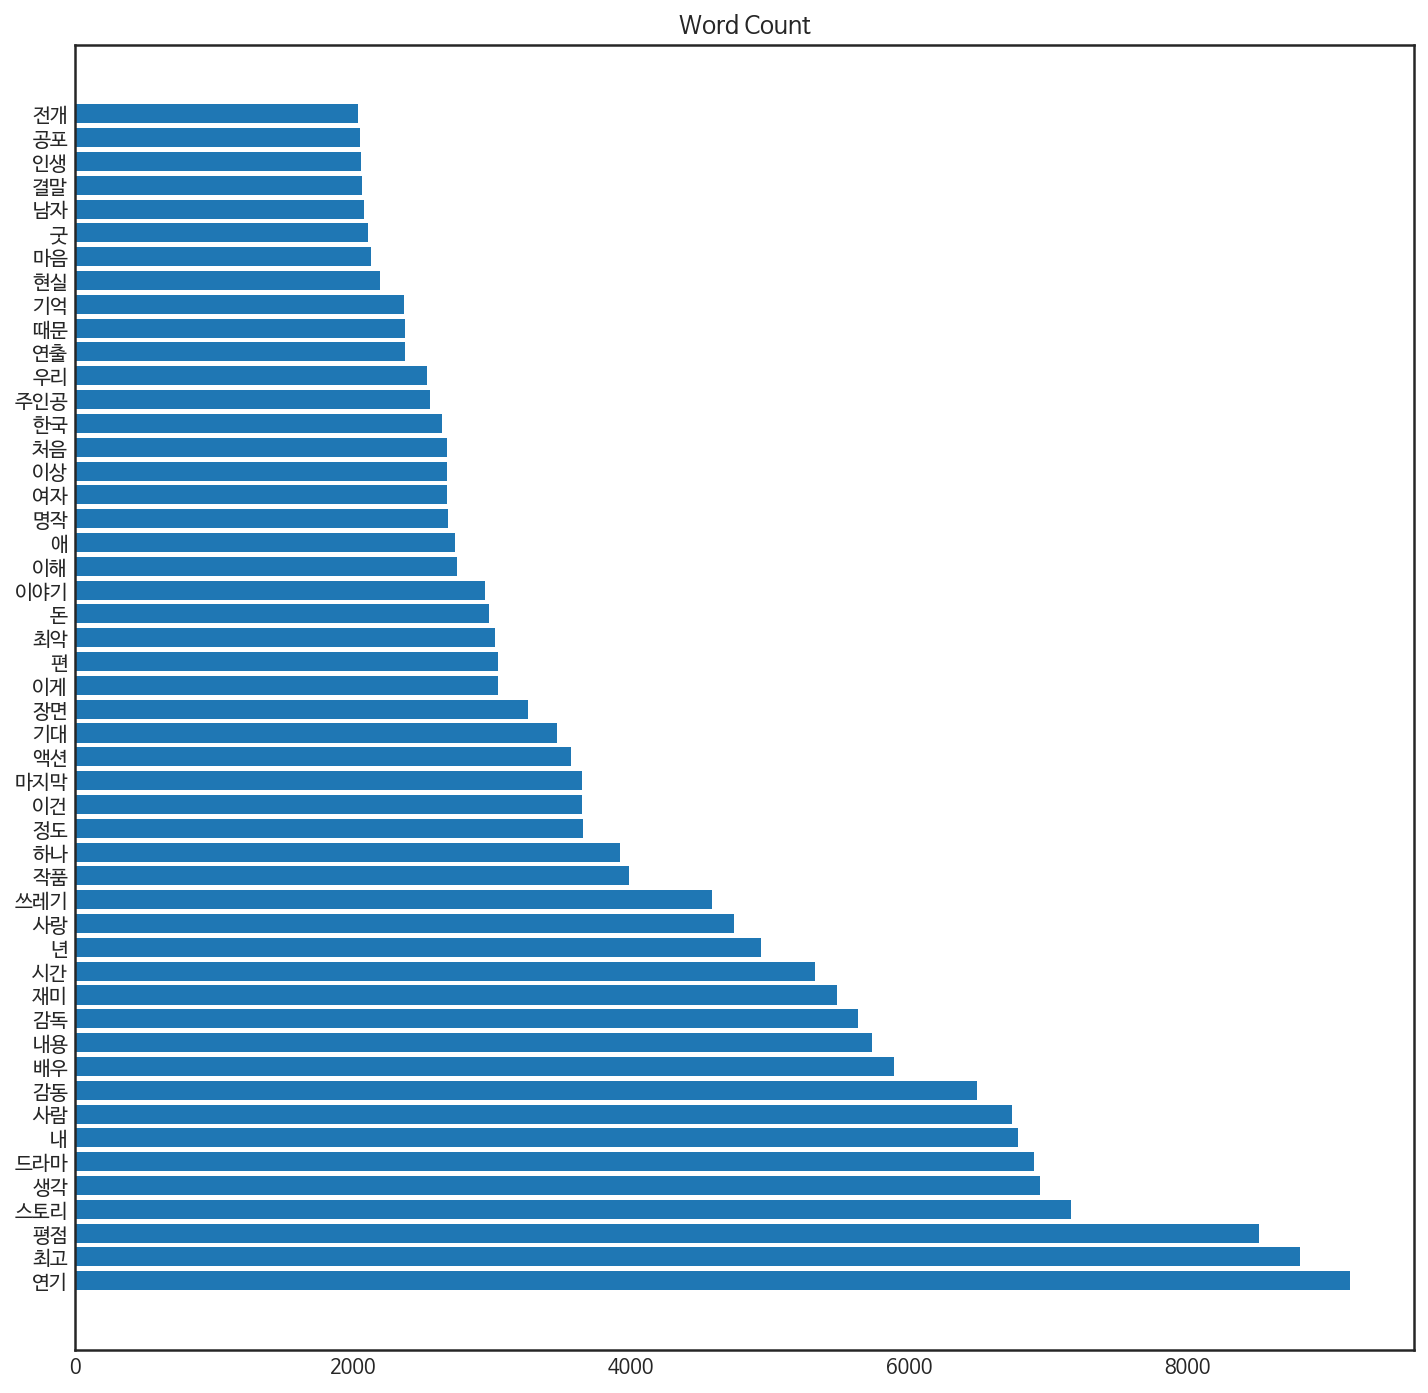

In [22]:
y_pos = np.arange(len(top_nouns))

plt.figure(figsize=(12,12))
plt.barh(y_pos, top_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

### 워드 클라우드(Word Cloud)
- ```WordCloud``` 라이브러리 (```matplot``` 기반)

In [24]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud

- ```WordCloud()```를 이용해 객체 생성 후, ```generate_from_frequencies()```함수로 빈도수에 따른 워드클라우드 생성

In [30]:
wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns);

- 시각화하기 위해서는 ```imshow()``` 함수를 사용

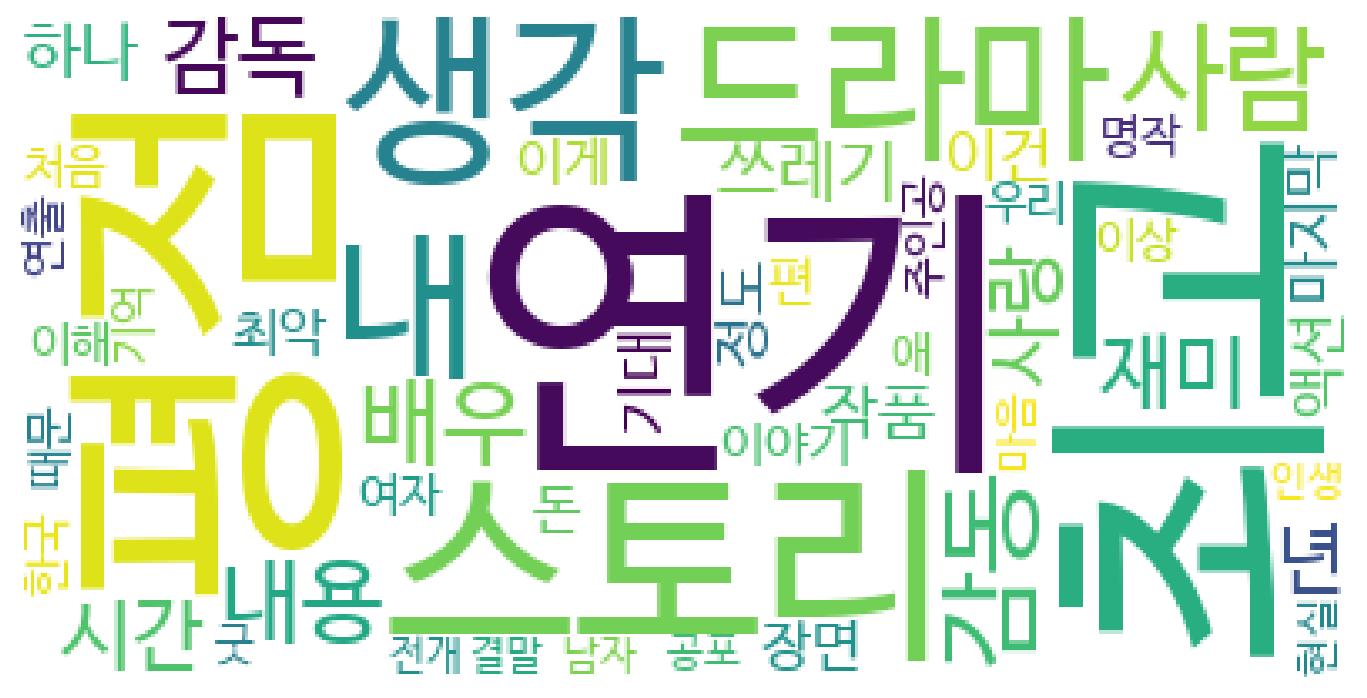

In [42]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.axis('off')
ax.imshow(wc);

### 트리맵 시각화
- ```squarify``` 라이브러리
- 키워드와 키워드 빈도수를 트리맵으로 시각화

In [37]:
!pip install squarify

In [38]:
import squarify

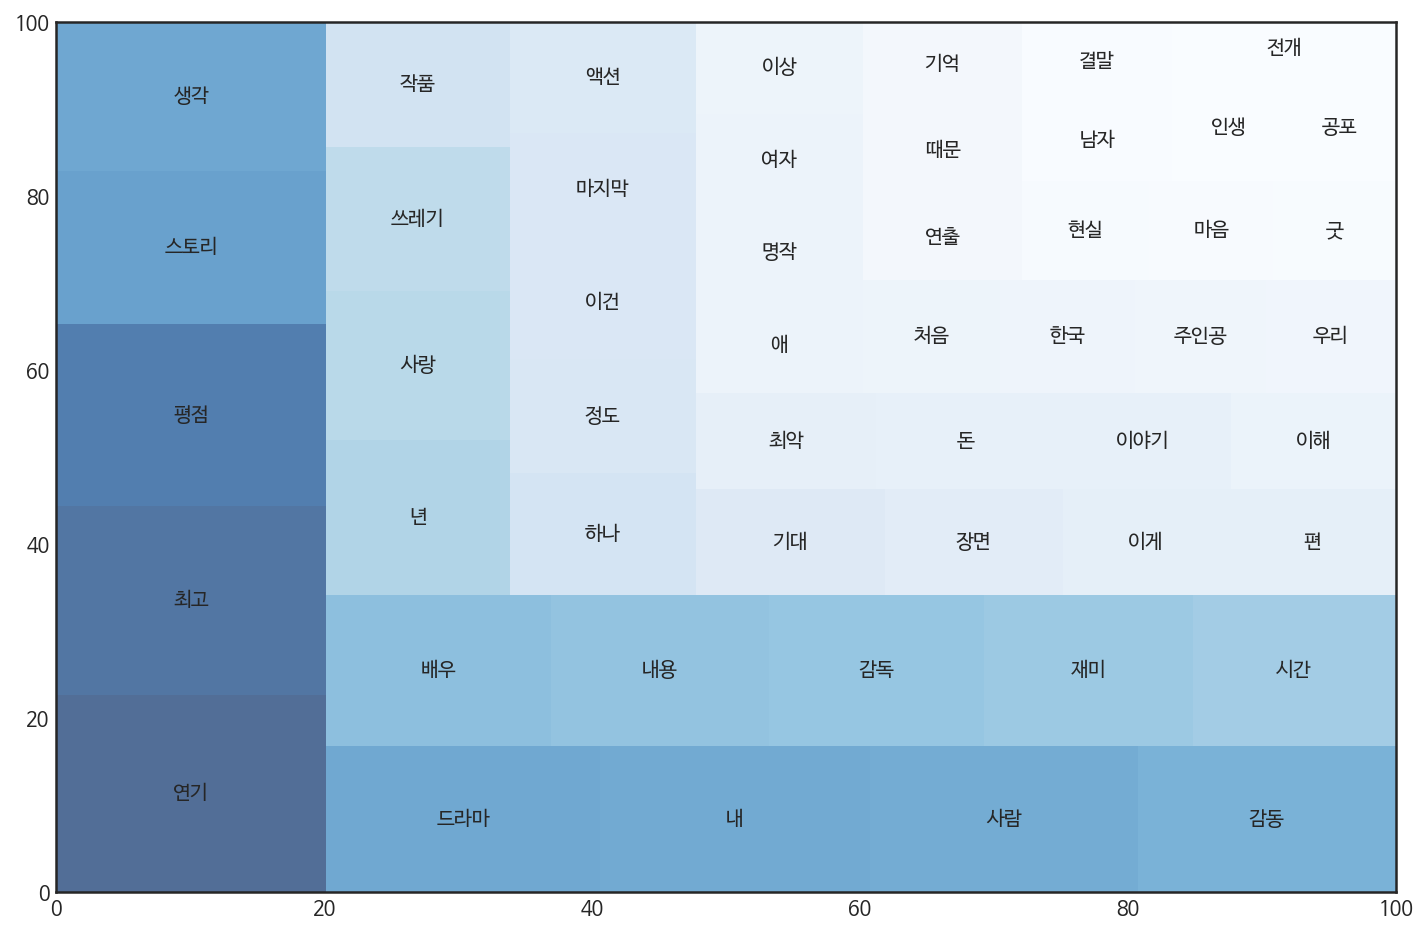

In [49]:
# 정규화 기준
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()] # norm(value): 각각의 값이 정규화 과정을 거친다. => 빈도수에 따라 색을 지정한다.

fig = plt.figure(figsize=(12,8))
squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.7, );